In [221]:
# import necesary packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [245]:
# set data visualizations 

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (15, 10) 

In [246]:
# load the data file 

dataframe = pd.read_csv('datasets/titanic/train.csv')

In [247]:
# overview of data

print(dataframe.head())
print(dataframe.info())
print(dataframe.describe())
print(dataframe.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [248]:
# check for missing values

dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [249]:
# clean the data

dataframe.drop(columns=['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
dataframe['Age'] = dataframe['Age'].fillna(dataframe['Age'].median())
dataframe['Embarked'] = dataframe['Embarked'].fillna(dataframe['Embarked'].mode()[0])

In [250]:
# new overview of data

print(dataframe.info())
print(dataframe.describe())
print(dataframe.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.5000

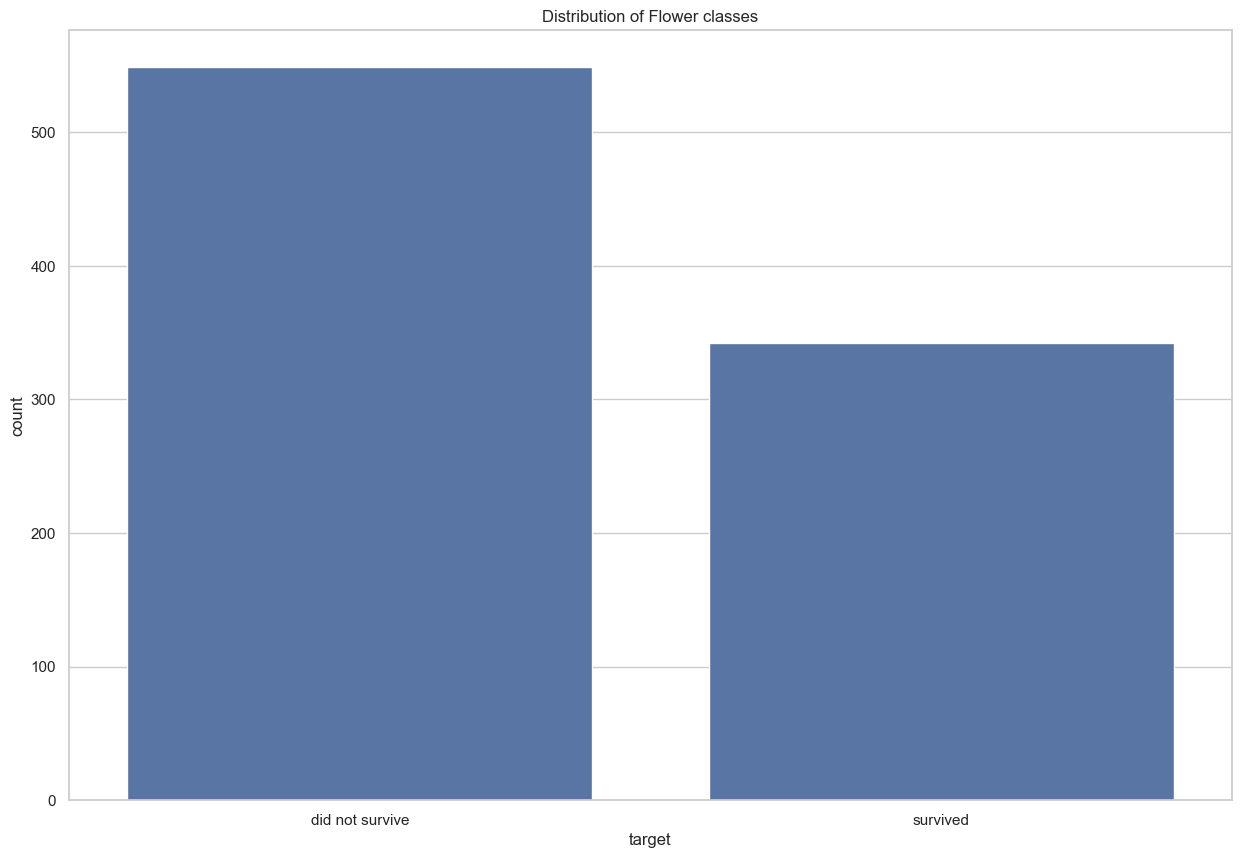

In [251]:
# countplot of survival classes

sns.countplot(x='Survived', data=dataframe)
plt.xticks([0, 1], ["did not survive", "survived"])
plt.xlabel('target')
plt.title('Distribution of Flower classes')
plt.show()

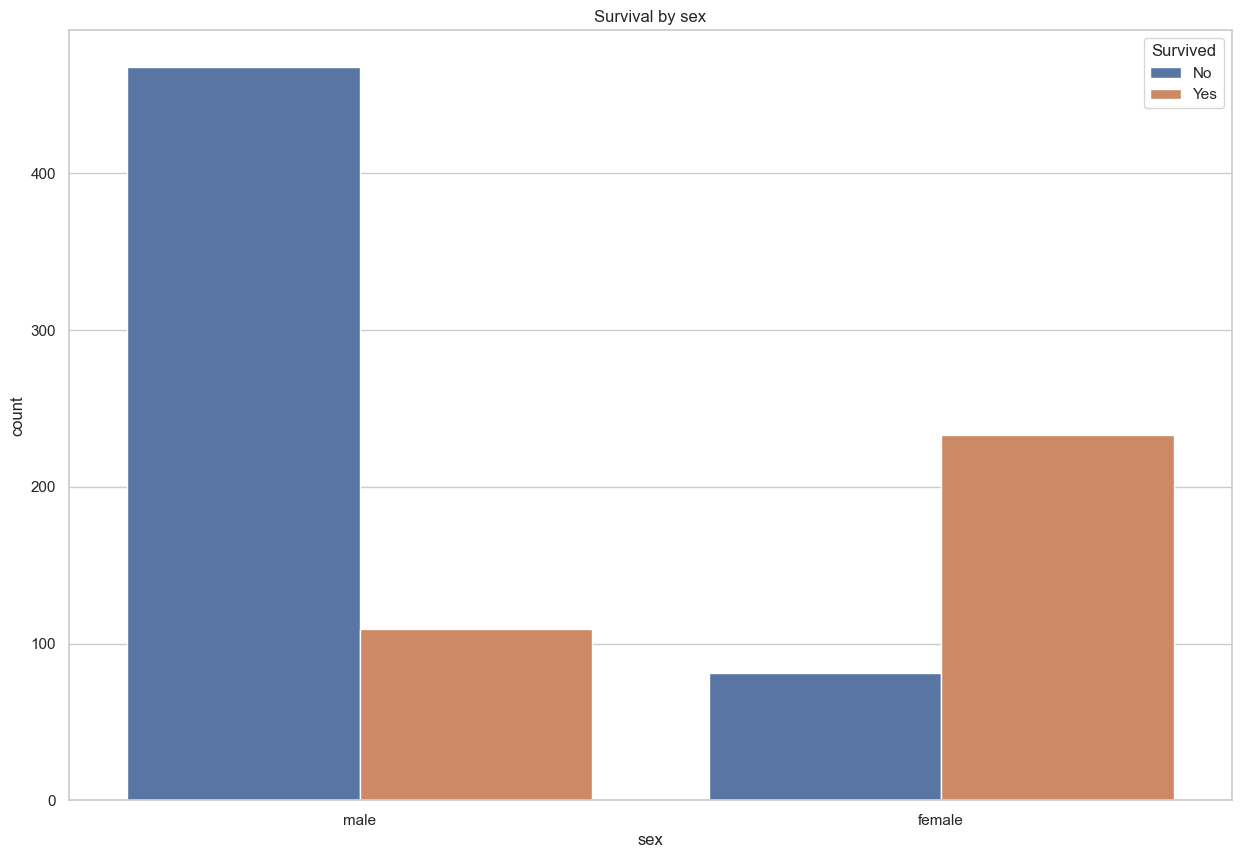

In [252]:
# countplot of survival by sex

sns.countplot(x='Sex', hue='Survived', data=dataframe)
plt.title('Survival by sex')
plt.xlabel('sex')
plt.ylabel('count')
plt.legend(title='Survived', labels=['No','Yes'])
plt.show()

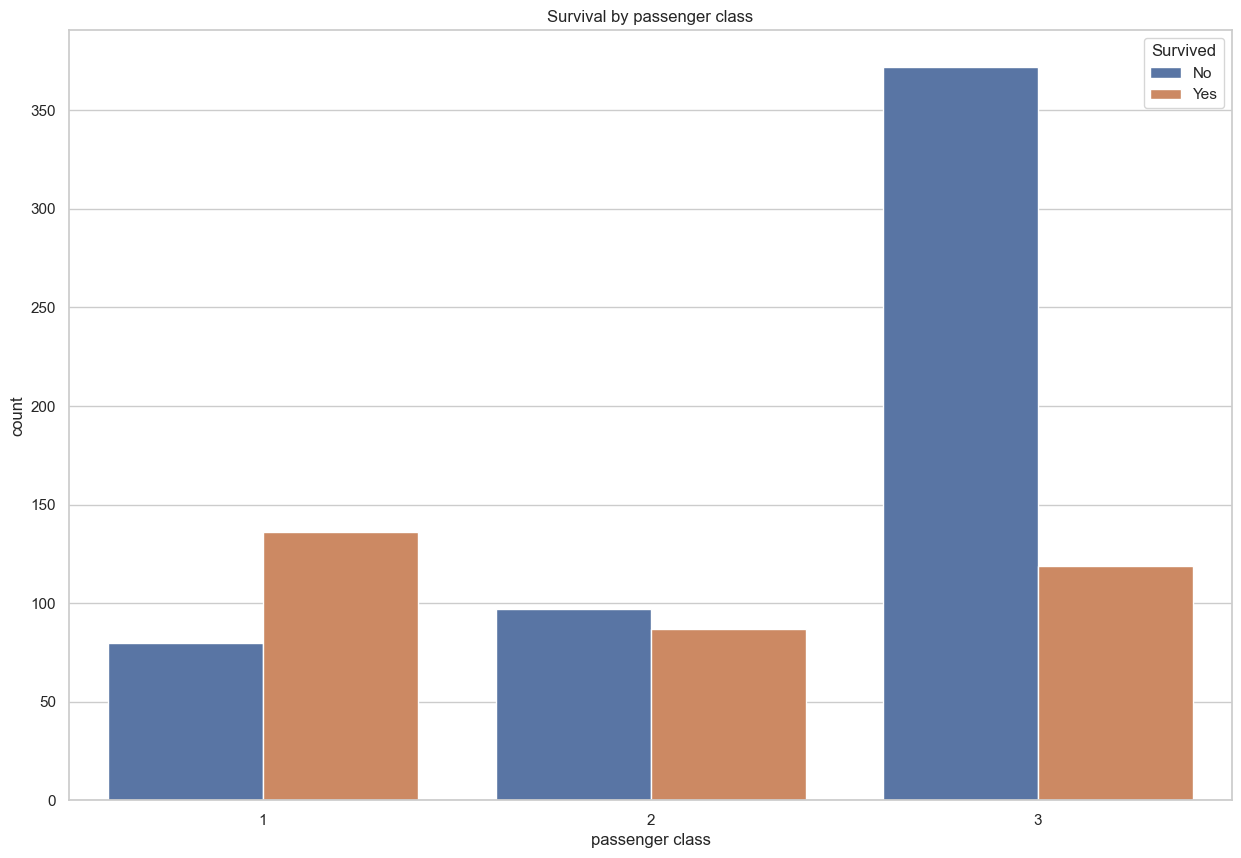

In [253]:
# countplot of survival by passenger class

sns.countplot(x='Pclass', hue='Survived', data=dataframe)
plt.title('Survival by passenger class')
plt.xlabel('passenger class')
plt.ylabel('count')
plt.legend(title='Survived', labels=['No','Yes'])
plt.show()

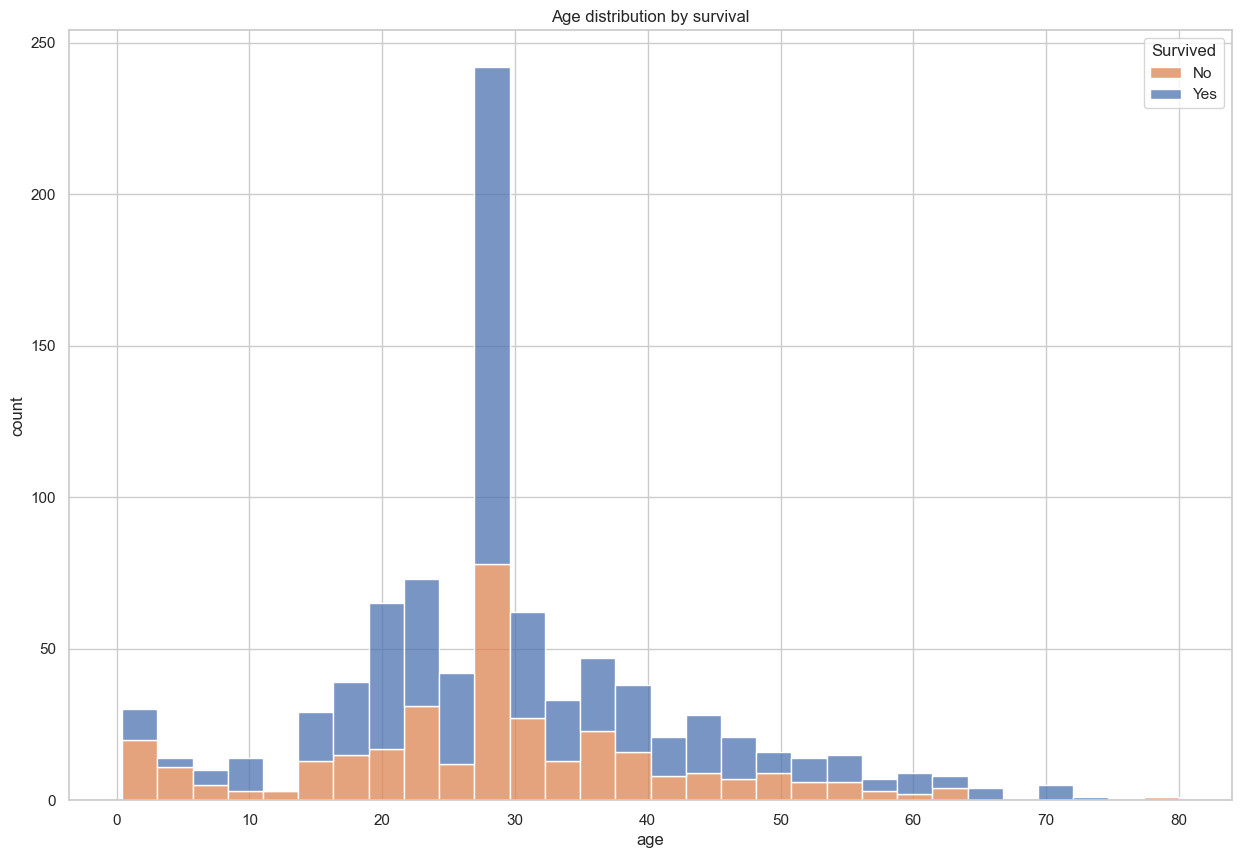

In [254]:
# histoplot showing age distribution by survival

sns.histplot(data=dataframe, x='Age', hue='Survived', bins=30, kde=False, multiple='stack')
plt.title('Age distribution by survival')
plt.xlabel('age')
plt.ylabel('count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

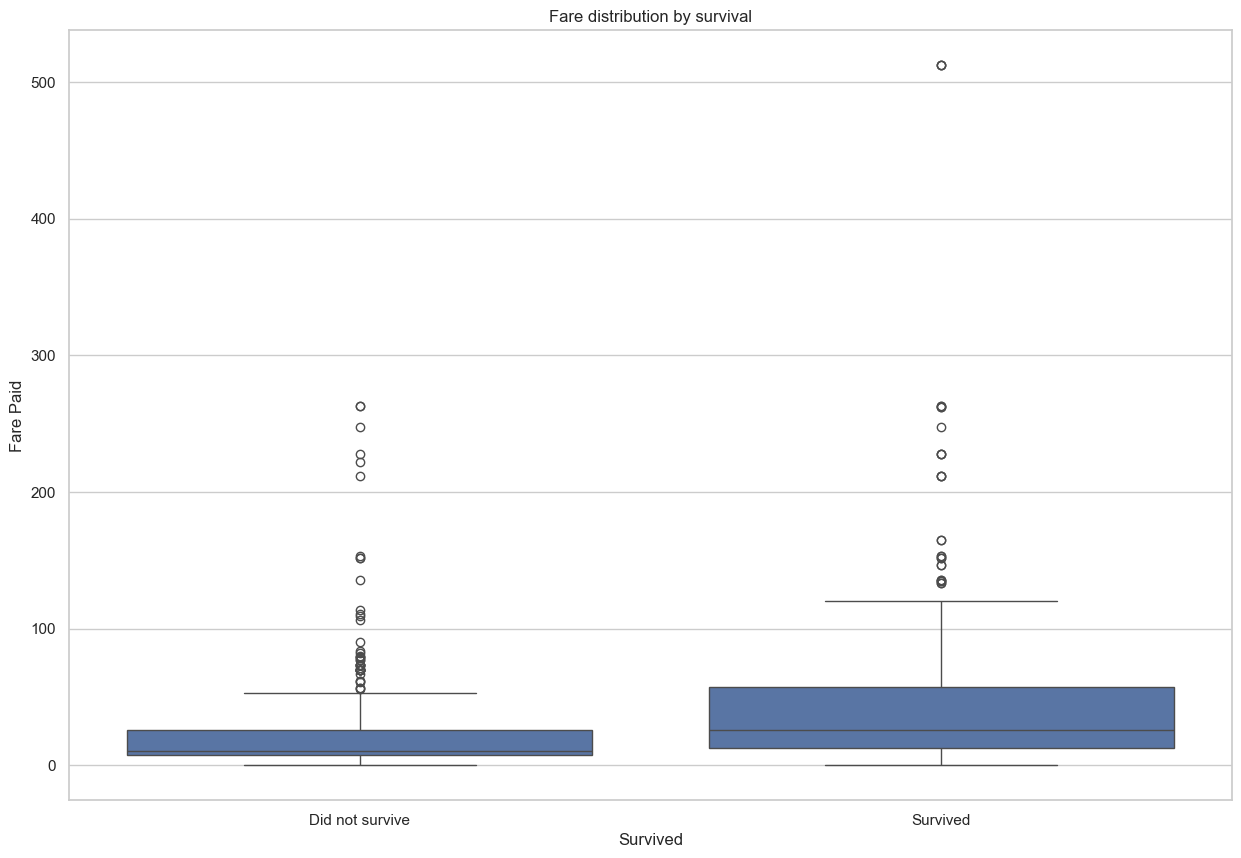

In [255]:
# boxplot showing fare vs survival

sns.boxplot(x='Survived', y='Fare', data=dataframe)
plt.title('Fare distribution by survival')
plt.xticks([0, 1], ['Did not survive', 'Survived'])
plt.ylabel('Fare Paid')
plt.show()

In [256]:
# seperate the feature and target variables

X = dataframe.drop("Survived", axis=1)
y = dataframe["Survived"]

In [257]:
# split dataset into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [258]:
# encode categorical variables and scale numerucal features using column transformer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), ['Embarked']),
                  ('ordinal', OrdinalEncoder(), ['Sex', 'Pclass']),
                 ('scaler', StandardScaler(), ['Age', 'Fare'])],
    remainder='passthrough'
)

In [259]:
# build the pipeline

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('preprocessor', ct),
    ('model', DecisionTreeClassifier(random_state=42))
])

In [260]:
# train the pipeline on training data

pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehot', ...), ('ordinal', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [261]:
# evaluate the test set

y_pred = pipeline.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1])

In [262]:
# evaluate model accuracy

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7597765363128491
Confusion Matrix:
 [[83 22]
 [21 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79       105
           1       0.71      0.72      0.71        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



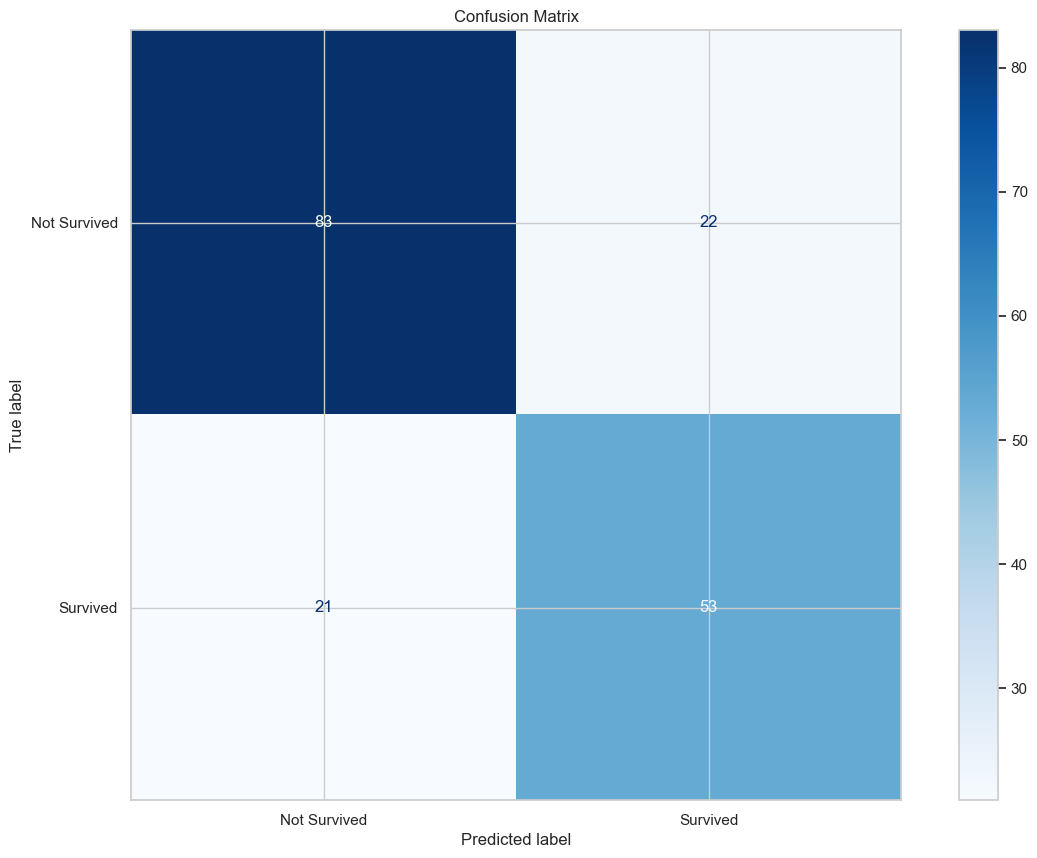

In [263]:
# confusion matrix heatmap

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["Not Survived", "Survived"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

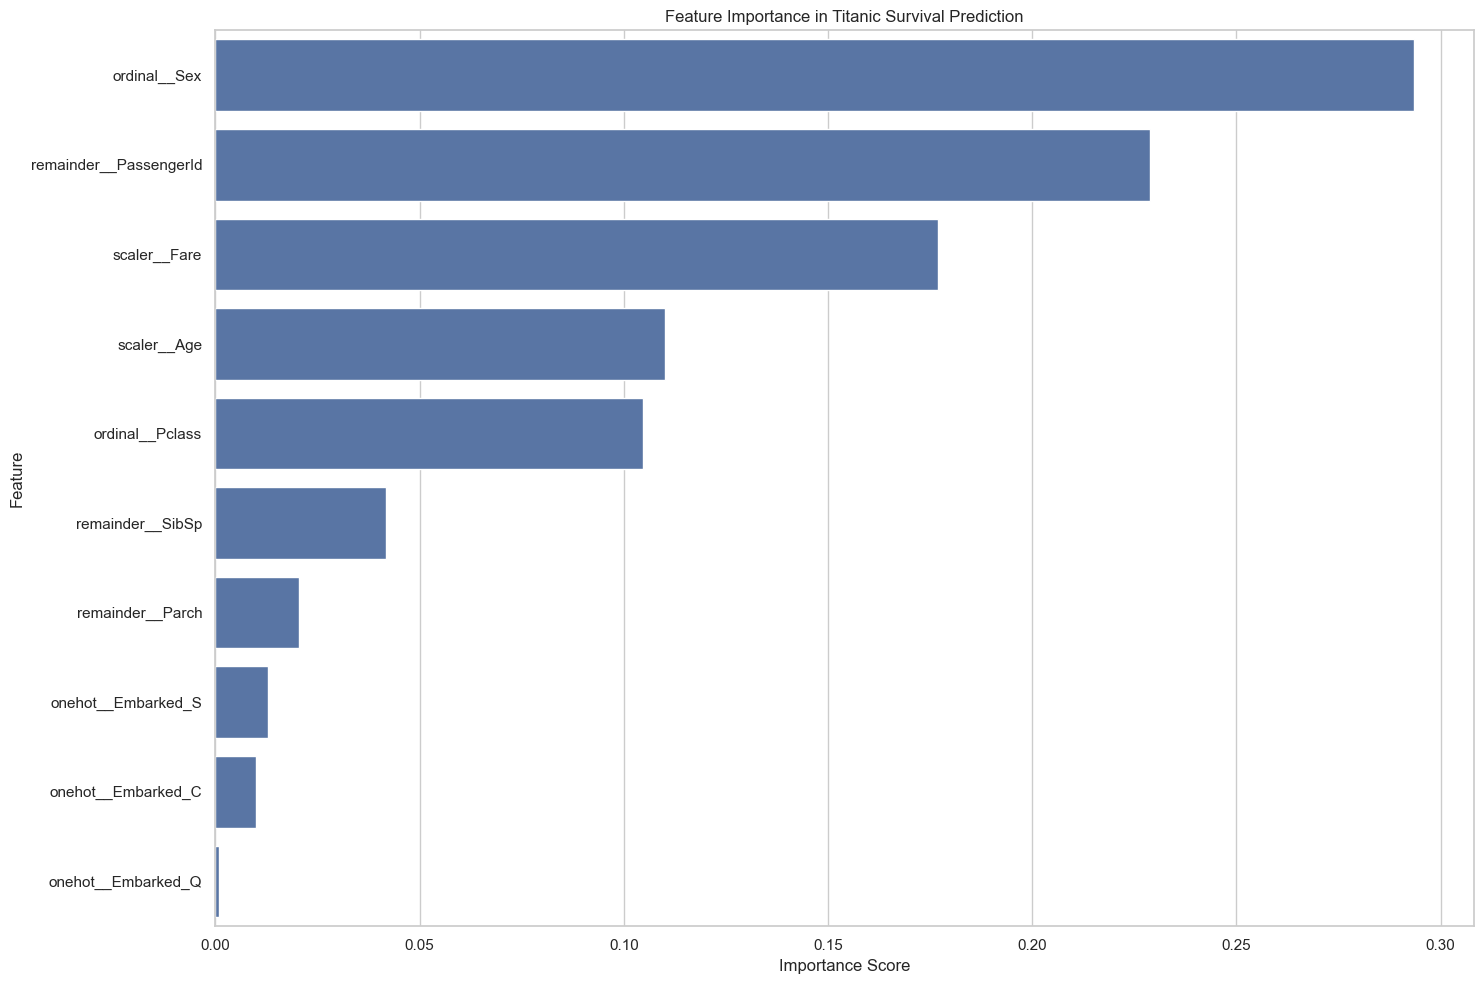

In [264]:
# plot feature importance

feature_names = ct.get_feature_names_out()
importances = pipeline.named_steps['model'].feature_importances_

feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(data=feat_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance in Titanic Survival Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

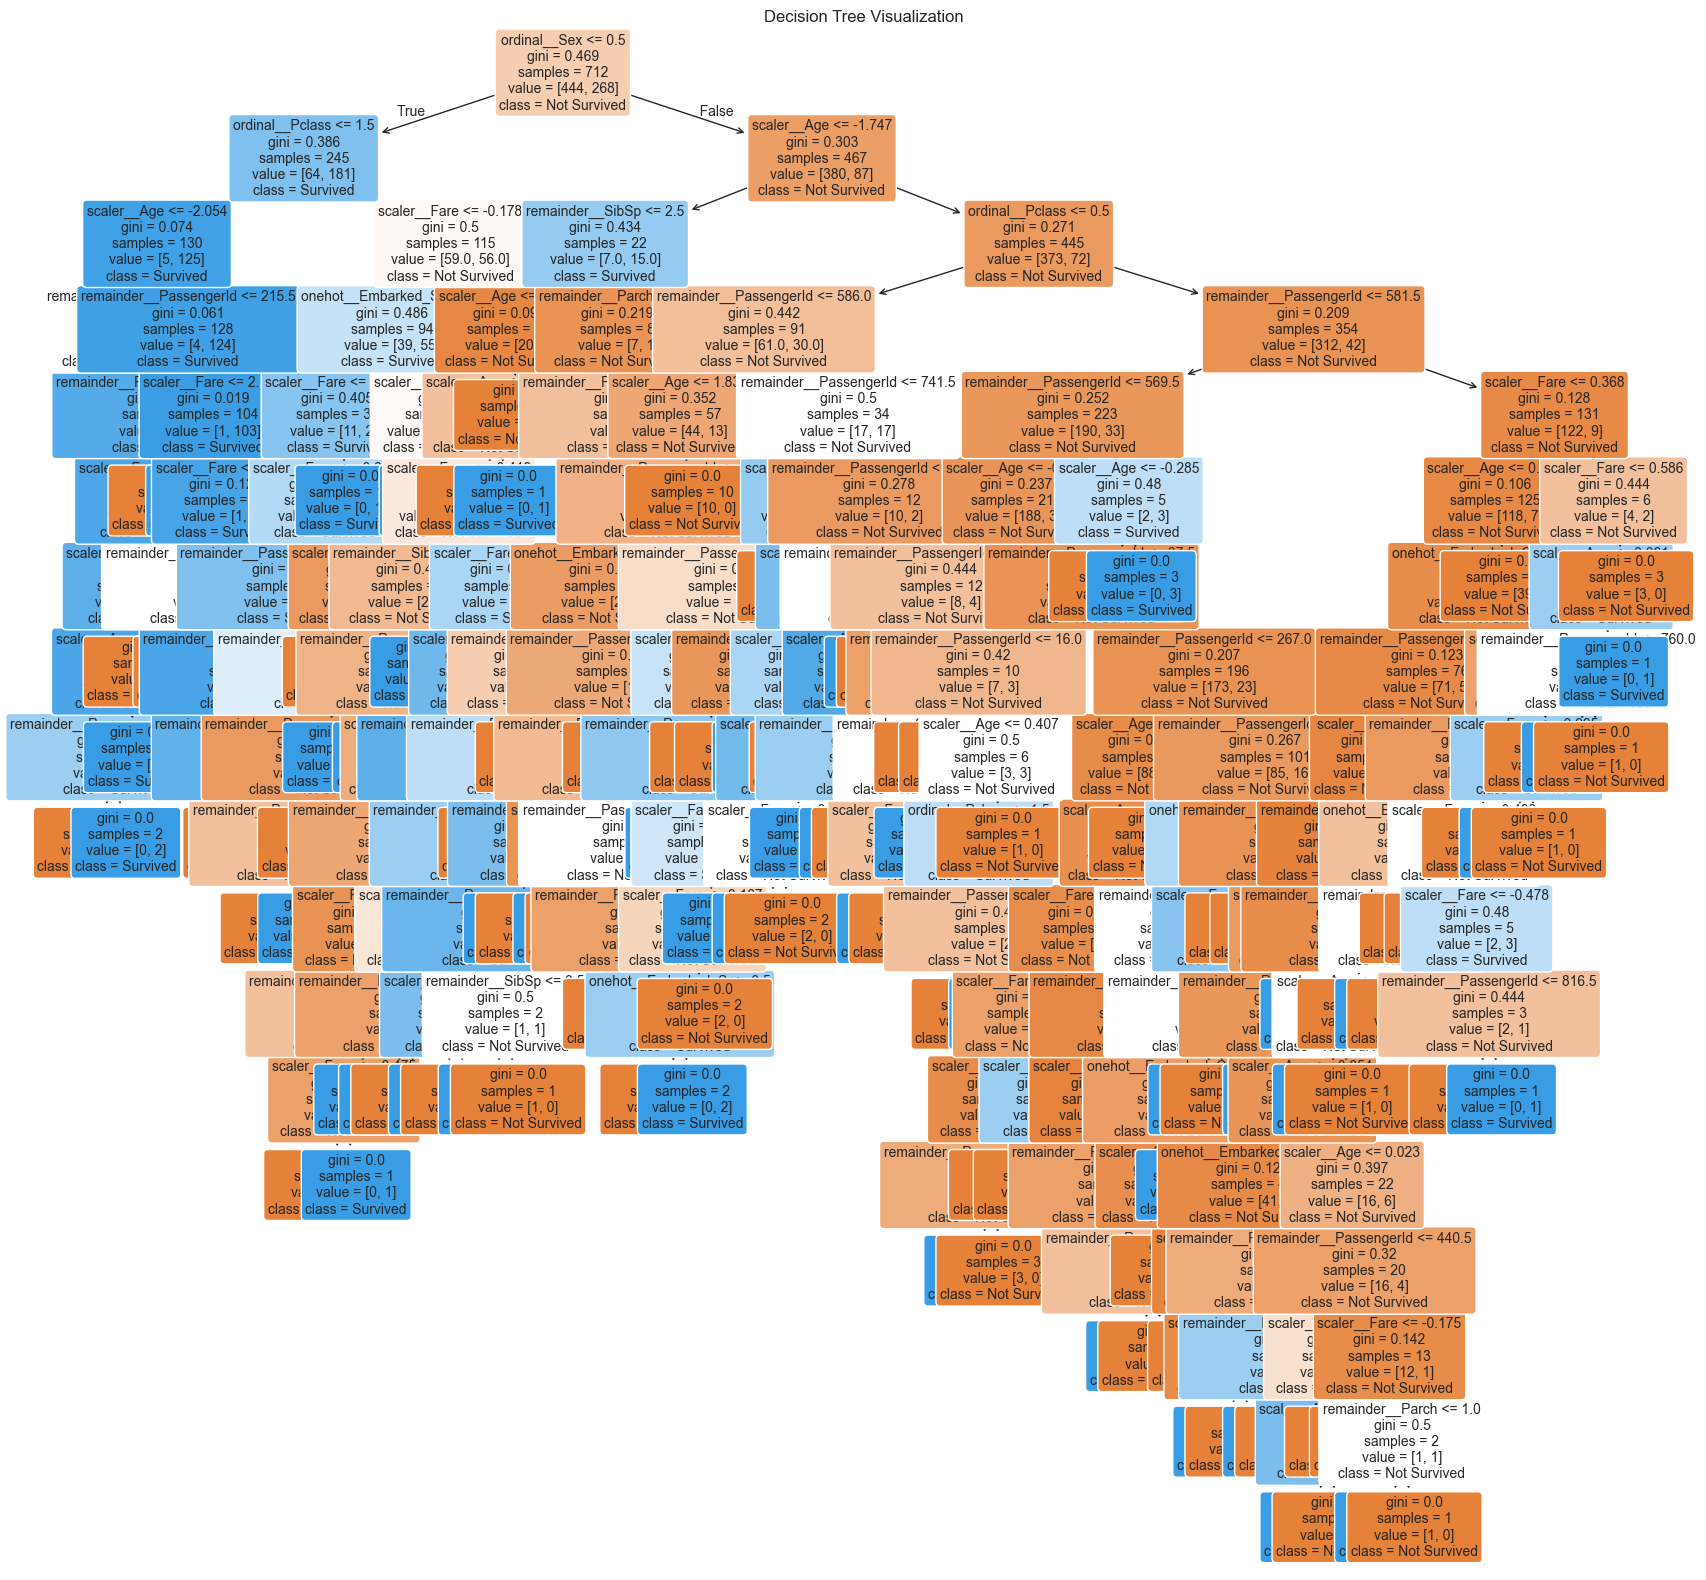

In [270]:
# plot decision tree

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(
    pipeline.named_steps['model'],  
    feature_names=ct.get_feature_names_out(), 
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree Visualization")
plt.show()